In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Testing FFT with a sample image

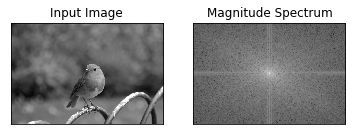

In [2]:
img = cv2.imread('sample1_l.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
img.shape

(478, 717)

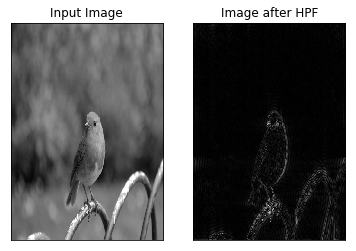

In [4]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray',aspect='auto')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray',aspect='auto')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
# plt.subplot(133),plt.imshow(img_back,aspect='auto')
# plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

c:\users\predatorx\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


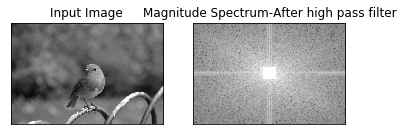

In [5]:
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum-After high pass filter'), plt.xticks([]), plt.yticks([])
plt.show()

# Applying FFT on Google Earth Images

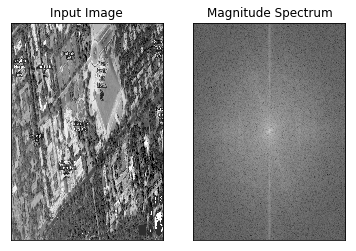

In [6]:
img = cv2.imread('toogreen.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray',aspect='auto')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray',aspect='auto')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
cv2.imwrite("Magspec.png",magnitude_spectrum)
plt.show()

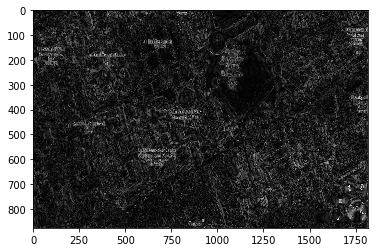

In [7]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img_back, cmap = 'gray',aspect='auto')
# plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
cv2.imwrite("FourierE.png",img_back)


plt.show()

Removing the low frequency regions gave us some form of edges i.e the high frequency regions.

# Applying HOG to the above result obtained from applying FFT

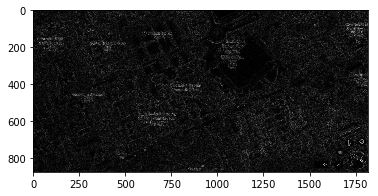

In [14]:
im = cv2.imread('FourierE.png',0)
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
cv2.imwrite('detected_edge_fft.png',mag)
plt.imshow(mag,cmap='gray')

# Applying HOG directly to the satellite image in grayscale

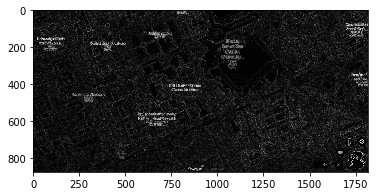

In [15]:
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
cv2.imwrite('detected_edge.png',mag)
plt.imshow(mag,cmap='gray')

HOG for object detection returns a more useful result. But this isn't conclusive yet as lower frequency regions can be removed in a much better fashion using gausian windows which is yet to be tried.